<a href="https://colab.research.google.com/github/thisisrajarshi/PRODIGY_ML_01/blob/main/Correlation_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

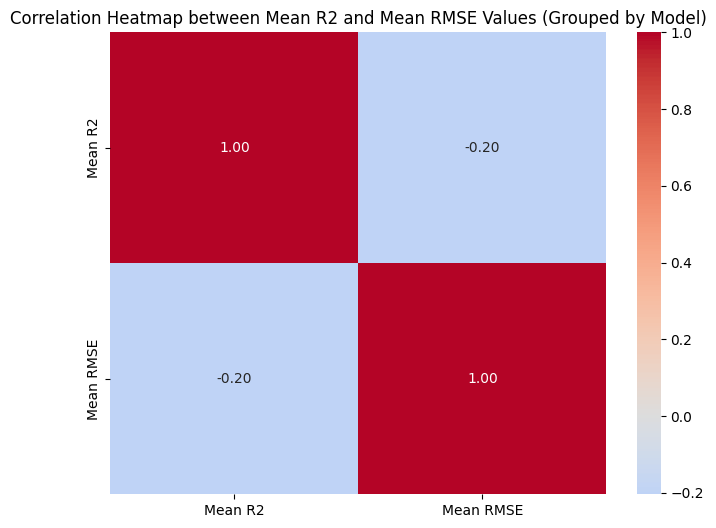

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file (adjust the file path if needed)
file_path = '/content/Blank 2.xlsx'  # Assuming you've uploaded it to Colab

# Read the data, skipping the first row as it contains the header
df = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=1)

# Rename the columns to be more descriptive
df.columns = ['Model', 'R2 (Correlation coefficient)', 'RMSE (Root mean square error)']

# Simplify model names to base forms: RF, CNN, SVM
def simplify_model(name):
    if pd.isna(name):
        return 'Other'
    name = str(name)
    if 'RF' in name:
        return 'RF'
    elif 'CNN' in name:
        return 'CNN'
    elif 'SVM' in name or 'SVR' in name:
        return 'SVM'
    else:
        return 'Other'

df['Model_Simple'] = df['Model'].apply(simplify_model)

# Filter only the main models
main_models_df = df[df['Model_Simple'].isin(['RF', 'CNN', 'SVM'])].copy()

# Convert R2 and RMSE to numeric (handling any non-numeric values)
main_models_df['R2 (Correlation coefficient)'] = pd.to_numeric(
    main_models_df['R2 (Correlation coefficient)'], errors='coerce'
)
main_models_df['RMSE (Root mean square error)'] = pd.to_numeric(
    main_models_df['RMSE (Root mean square error)'], errors='coerce'
)

# Drop rows where conversion to numeric failed
main_models_df.dropna(subset=['R2 (Correlation coefficient)', 'RMSE (Root mean square error)'], inplace=True)


# Group by simplified model and calculate mean R2 and RMSE
mean_stats = main_models_df.groupby('Model_Simple').agg({
    'R2 (Correlation coefficient)': 'mean',
    'RMSE (Root mean square error)': 'mean'
}).rename(columns={
    'R2 (Correlation coefficient)': 'Mean R2',
    'RMSE (Root mean square error)': 'Mean RMSE'
})

# Calculate the correlation matrix
corr = mean_stats.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap between Mean R2 and Mean RMSE Values (Grouped by Model)')
plt.show()

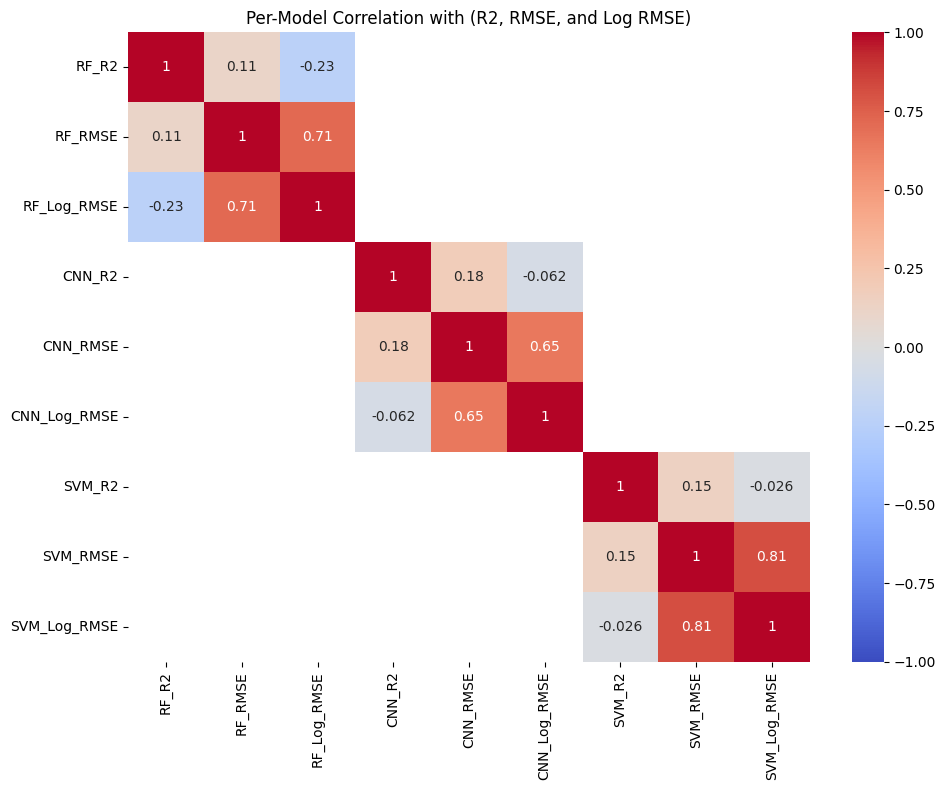

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file (adjust path if needed)
file_path = '/content/Blank 2.xlsx'  # Upload your file to Colab first
# Read the data, skipping the first row as it contains the header
df = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=1)

# Rename columns for clarity (based on your data structure)
df = df.rename(columns={
    'Unnamed: 0': 'Model',
    'Unnamed: 1': 'R2',
    'Unnamed: 2': 'RMSE'
})

# Convert to numeric
df['R2'] = pd.to_numeric(df['R2'], errors='coerce')
df['RMSE'] = pd.to_numeric(df['RMSE'], errors='coerce')

# Simplify model names
def simplify_model(name):
    if pd.isna(name):
        return 'Other'
    name = str(name)
    if 'RF' in name:
        return 'RF'
    elif 'CNN' in name:
        return 'CNN'
    elif 'SVM' in name or 'SVR' in name:
        return 'SVM'
    else:
        return 'Other'

df['Model_Simple'] = df['Model'].apply(simplify_model)

# Filter to main models and drop any rows with NaN metrics
main_df = df[df['Model_Simple'].isin(['RF', 'CNN', 'SVM'])].dropna(subset=['R2', 'RMSE'])

# Prepare correlation matrices per model
corr_dfs = []
for model in ['RF', 'CNN', 'SVM']:
    subset = main_df[main_df['Model_Simple'] == model][['R2', 'RMSE']].copy()
    # Check if the 'RMSE' column is all zeros before applying log transform
    if (subset['RMSE'] == 0).any():
      # Add a small constant before taking the log to avoid log(0)
      subset['Log_RMSE'] = np.log(subset['RMSE'] + 1e-9)
    else:
      subset['Log_RMSE'] = np.log(subset['RMSE'])  # Log transform to handle scale
    corr = subset.corr()
    # Rename for clarity in combined matrix
    corr.index = [f'{model}_{idx}' for idx in corr.index]
    corr.columns = [f'{model}_{col}' for col in corr.columns]
    corr_dfs.append(corr)

# Concatenate vertically into a single matrix (block-diagonal with NaNs elsewhere)
combined_corr = pd.concat(corr_dfs, axis=0)

# Plot the single heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, mask=combined_corr.isnull())
plt.title('Per-Model Correlation with (R2, RMSE, and Log RMSE)')
plt.tight_layout()
plt.show()